In [1]:
from qiskit import QuantumCircuit,QuantumRegister
from qiskit.quantum_info import Statevector,Operator,DensityMatrix
from qiskit.primitives import Sampler
from qiskit.visualization import plot_histogram

In [2]:
qr = QuantumRegister(4)
qc = QuantumCircuit(qr)
qc.h(qr)
initial_superposition_state = Statevector.from_instruction(qc)

In [3]:
# qc.draw('mpl')

In [4]:
target_state = Statevector.from_label('1101')

In [5]:
grover_oracle = Operator.from_label('IIII') - 2*DensityMatrix(target_state)
# grover_oracle.draw('latex')

In [6]:
grover_diffusion_operator = 2*DensityMatrix(initial_superposition_state) - Operator.from_label('IIII')
# grover_diffusion_operator.draw('latex')

In [7]:
qc.unitary(grover_oracle,qr,'Oracle')
# qc.draw('mpl')

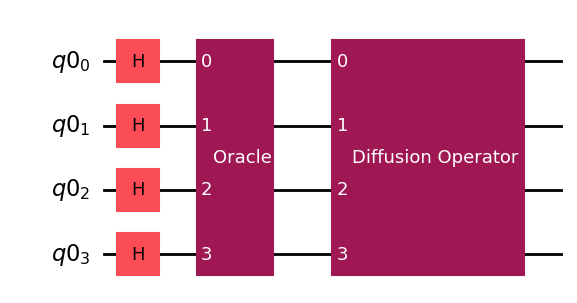

In [8]:
qc.unitary(grover_diffusion_operator,qr,'Diffusion Operator')
qc.draw('mpl')

In [9]:
qc.measure_all()
sampler = Sampler()
job = sampler.run(qc)
counts = job.result().quasi_dists[0]




In [10]:
def binary_counts(counts:dict,num_qubits:int):
    bindigits = 2 ** num_qubits
    bin_counts = {f"{key:0{num_qubits}b}" : value for key , value in counts.items()}
    return bin_counts

bin_counts = binary_counts(counts,4)

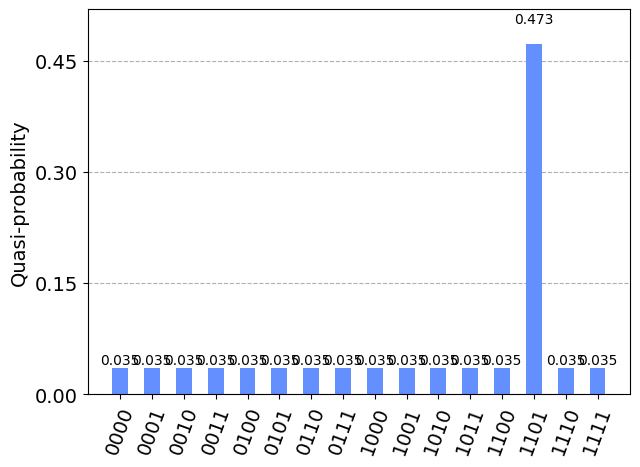

In [11]:
plot_histogram(bin_counts)

In [12]:
qc.decompose(reps=3).depth()

397

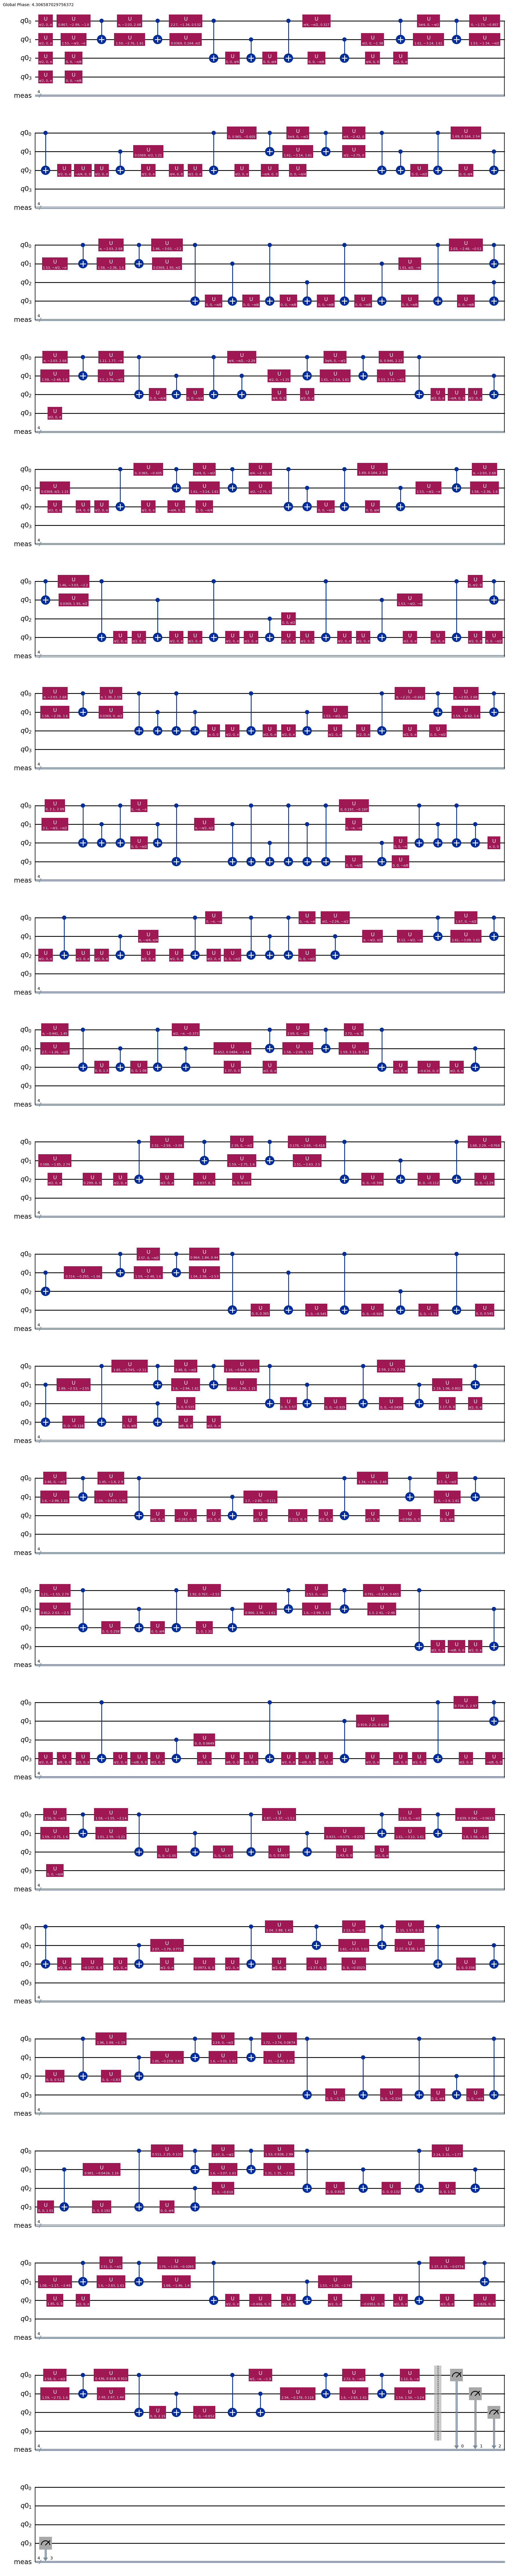

In [13]:
 qc.decompose(reps=3).draw('mpl')

In [14]:
qc.decompose(reps=3).depth()

397

In [15]:
get_counts = qc.decompose(reps=3).count_ops()
cnot_count = get_counts.get('cx',0)
print(cnot_count)

186


In [16]:
get_counts = qc.decompose(reps=3).count_ops()
cnot_count = get_counts.get('u',0)
print(cnot_count)

350
